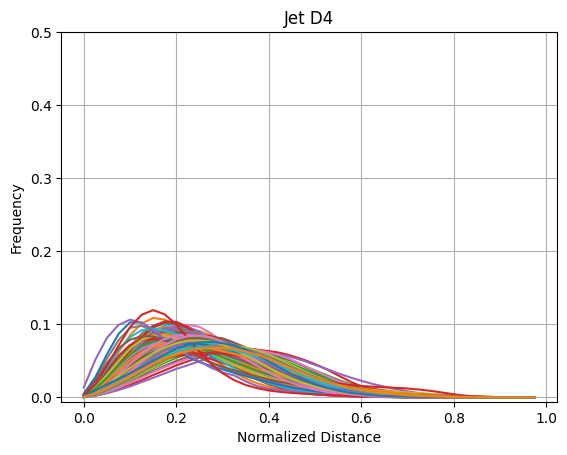

In [139]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt


data = []

for obj_file_path in glob.glob(os.path.join(r"../features/Jet/", '*')):
    data.append(np.load(obj_file_path, allow_pickle=True))


subplot = 111
for i in range(len(data)):
    plt.subplot(subplot)
    plt.plot(np.asarray(range(40)) / 40, data[i][-1])

plt.xlabel('Normalized Distance')
plt.ylabel('Frequency')
plt.ylim(top=0.5)
plt.title('Jet D4')
plt.grid(True)

# Display the histogram
plt.show()

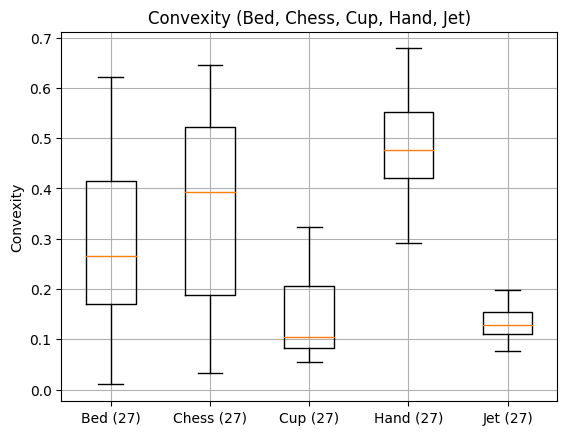

In [105]:
import numpy as np
import glob
import os
import matplotlib.pyplot  as plt


data1 = []

for obj_file_path in glob.glob(os.path.join(r"../features/Bed", '*')):
    data1.append(np.load(obj_file_path, allow_pickle=True))

data2 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Jet", '*')):
    data2.append(np.load(obj_file_path, allow_pickle=True))

data3 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Cup", '*')):
    data3.append(np.load(obj_file_path, allow_pickle=True))

data4 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Hand", '*')):
    data4.append(np.load(obj_file_path, allow_pickle=True))

data5 = []
for obj_file_path in glob.glob(os.path.join(r"../features/Chess", '*')):
    data5.append(np.load(obj_file_path, allow_pickle=True))

plot1 = []
plot2 = []
plot3 = []
plot4 = []
plot5 = []

index = 6

for i in range(len(data1)):
    try:
        plot1.append(abs(data1[i][index]))
    except:
        pass
    try:
        plot5.append(abs(data2[i][index]))
    except:
        pass
    try:
        plot2.append(abs(data5[i][index]))
    except:
        pass
    try:
        plot4.append(abs(data4[i][index]))
    except:
        pass
    try:
        plot3.append(abs(data3[i][index]))
    except:
        pass

plt.boxplot([plot1, plot2, plot3, plot4, plot5], [], showfliers=False)
labels = ("Bed ({})".format(len(plot1)), "Chess ({})".format(len(plot2)), "Cup ({})".format(len(plot3)), "Hand ({})".format(len(plot4)), "Jet ({})".format(len(plot5)))
plt.xticks(np.arange(len(labels))+1,labels)

plt.ylabel('Convexity')
plt.title('Convexity (Bed, Chess, Cup, Hand, Jet)')
plt.grid(True)

# Display the histogram
plt.show()